In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\Faiq Hilman\Downloads\wine.csv")
df

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df.drop('Class label', inplace=True, axis=1)
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
X = df.values
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

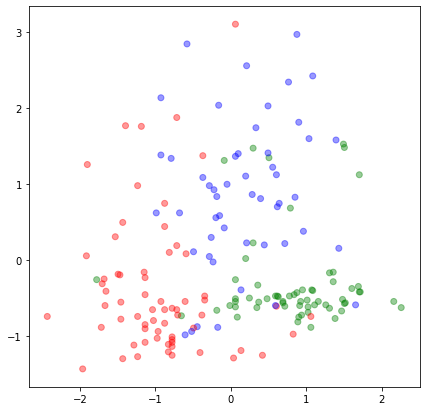

In [10]:
from sklearn.cluster import KMeans
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X_std)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X_std[:,0],X_std[:,1], c= label_color, alpha=0.4) 
plt.show()

In [13]:
df['cluster'] = X_clustered
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [19]:
X_clustered.shape



(178,)

In [24]:
df['cluster'].value_counts()

0    65
1    62
2    51
Name: cluster, dtype: int64

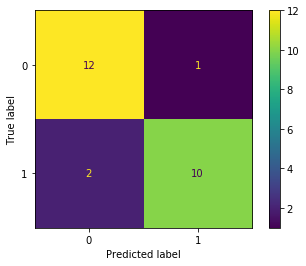

In [27]:
>>> import matplotlib.pyplot as plt
>>> from sklearn.datasets import make_classification
>>> from sklearn.metrics import plot_confusion_matrix
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.svm import SVC
>>> X= df[['Alcohol', 'Total phenols']]
>>> y = df['cluster']
>>> X, y = make_classification(random_state=0)
>>> X_train, X_test, y_train, y_test = train_test_split(
...         X, y, random_state=0)
>>> clf = SVC(random_state=0)
>>> clf.fit(X_train, y_train)
SVC(random_state=0)
>>> plot_confusion_matrix(clf, X_test, y_test)  
>>> plt.show()

In [29]:

from sklearn.preprocessing import StandardScaler
features = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash']
x = df.loc[:, features].values
y = df.loc[:, ['cluster']].values
x = StandardScaler().fit_transform(x)



In [31]:


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



In [33]:
principalDf

,principal component 1,principal component 2
0,1.006230,-1.666990
1,2.392193,-0.661926
2,-0.462126,-0.622264
3,0.529258,-1.823498
4,-1.457187,-0.749499
...,...,...
173,-1.685137,-1.325702
174,-1.559870,-0.487808
175,-0.653030,-0.444286
176,-0.199258,-0.179451


In [34]:
finalDf = pd.concat([principalDf, df[['cluster']]], axis = 1)
finalDf

,principal component 1,principal component 2,cluster
0,1.006230,-1.666990,1
1,2.392193,-0.661926,1
2,-0.462126,-0.622264,1
3,0.529258,-1.823498,1
4,-1.457187,-0.749499,1
...,...,...,...
173,-1.685137,-1.325702,2
174,-1.559870,-0.487808,2
175,-0.653030,-0.444286,2
176,-0.199258,-0.179451,2


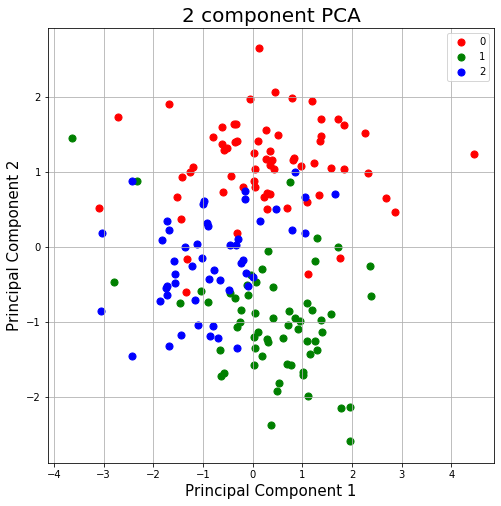

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
clusters = [0, 1, 2]
colors = ['r', 'g', 'b']
for cluster, color in zip(clusters,colors):
    indicesToKeep = finalDf['cluster'] == cluster
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(clusters)
ax.grid()